<a href="https://colab.research.google.com/github/TI1307/DM_Project/blob/main/notebooks/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing and cleaning


# Data Quality **Issues**


In [1]:
import pandas as pd
import matplotlib_inline

In [2]:
########    LIBRARY INVENTORY TABLE      ###############
LIBRARY_INVENTORY= pd.read_excel("../data/LIBRARY INVENTORY.xlsx")
print ('Number of instance in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY.shape[1]))
print(LIBRARY_INVENTORY.head(3))
print ('-'*20)
########  LIBRARY_CARALOGUE TABLE     ###############
LIBRARY_CATALOGUE= pd.read_excel("../data/library catalogue.xlsx")
print ('Number of instance in the LIBRARY CARALOGUE' , (LIBRARY_CATALOGUE.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_CATALOGUE.shape[1]))
print ('-'*20)
#######    BORROWING TABLE             ###########################
BORROWINGS= pd.read_excel("../data/Borrowings .xlsx")
print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS.shape[1]))
print(BORROWINGS.head(3))

Number of instance in the LIBRARY INVENTORY 4255
Number of attributes in the LIBRARY INVENTORY 16
  N° inventaire Date de réception  \
0         62504               NaT   
1        111442               NaT   
2             1        2021-12-19   

                                               Titre            Auteur  \
0  Programmation mathématique : théorie et algori...    Minoux, Michel   
1  Calcul des probabilités : cours, exercices et ...  Foata, Dominique   
2            Calcul DIfferentiel et Integral Tome 01       Piskounov,N   

                                  Editeur  Date d'édition Lieu d'édition  \
0                               Lavoisier          2008.0          Paris   
1                                   Dunod          2012.0          Paris   
2  Office des Publications Universitaires          2006.0        algerie   

  Edition Mode d'acquisition        Statut Fournisseur             N° achat  \
0  2e éd.             Passif           NaN         NaN                  

## **Cleaning Functions**


### **Missing Values**


In [3]:
# gives a summery of missing values
def missing_values_summary(df):
  missing_count = df.isnull().sum()
  missing_percent = (missing_count/ len(df))*100

  summery = pd.DataFrame({
      'missing_count': missing_count,
      'missing_percent': missing_percent
  })
  summery = summery.sort_values('missing_percent', ascending=False)
  return summery
import pandas as pd

def handle_missing_values(df, strategy_dict):
    """
    Fill missing values in a DataFrame according to a strategy dictionary.

    Parameters:
        df (pd.DataFrame): Input dataframe
        strategy_dict (dict): {column_name: strategy}, where strategy can be:
            - 'mean'   → fill numeric with mean
            - 'median' → fill numeric with median
            - 'mode'   → fill categorical with mode
            - value    → fill with this value directly

    Returns:
        pd.DataFrame: DataFrame with missing values handled
    """
    for col, strategy in strategy_dict.items():
        if strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif strategy == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Use the provided value
            df[col] = df[col].fillna(strategy)
    return df




### **Outliers**


### **Duplicate Data**


In [4]:
def checkDuplicat (df, table_name,  keep=False):
    dup=df.duplicated()
    dup_count=dup.sum()
    print(f'Number of duplicate rows in {table_name} table is = %d' % (dup_count))
    if dup_count > 0:
      print (f'\n Duplicare row in the table {table_name}:')
      dup_rows=df[dup]
      for idx in dup_rows.index:
          print(f'\n row number :{idx}')
          print(df.loc[idx])
          print('-' * 50)




### **Aggregation**


### **Sampling**


### **Discretization**


### Feature Engineering


In [5]:
# Dates formating 
def format_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def borrowing_duration(df,Date_prêt,Date_retour):
    format_dates(df, [Date_prêt,Date_retour])
    df['borrowing duration']=(df[Date_retour]-df[Date_prêt]).dt.days
    return 

# **Borowing Table**


**Table info**


In [22]:
# Cleaningg the borrowing table
# table name : BORROWINGS

print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS.shape[1]))
print(BORROWINGS.columns)

Number of instance in the BORROWINGS TABLE  422
Number of attributes in the BORROWINGS TABLE  11
Index(['Numéro', 'Cote', 'Titre', 'Type de document', 'N° lecteur', 'Nom',
       'Prénom', 'Catégorie', 'Date prêt', 'Date retour', 'Date réservation'],
      dtype='object')


**Missing Values & Check Duplicate**


In [6]:
# summery about missing values :
print(missing_values_summary(BORROWINGS))

#check duplicate :
checkDuplicat(BORROWINGS , "BORROWINGS TABLE ")

                  missing_count  missing_percent
Date réservation            414        98.104265
Cote                         14         3.317536
Numéro                        0         0.000000
Titre                         0         0.000000
Type de document              0         0.000000
N° lecteur                    0         0.000000
Nom                           0         0.000000
Prénom                        0         0.000000
Catégorie                     0         0.000000
Date prêt                     0         0.000000
Date retour                   0         0.000000
Number of duplicate rows in BORROWINGS TABLE  table is = 0


In [7]:
# we drop Date réservation because more then 60% (98%) of its value is missing 
BORROWINGS=BORROWINGS.drop(['Date réservation'],axis=1) 

**Outliers**:

First we convert the dates from string to date type , then calculate borrowing duration ( Date_retour- date_pret) , to get numurical values so we can detect outliers using box blot


In [8]:
borrowing_duration(BORROWINGS,'Date prêt','Date retour')
BORROWINGS = BORROWINGS.drop(['Date prêt', 'Date retour'], axis=1)
print(BORROWINGS.head())

   Numéro           Cote                                              Titre  \
0    1000        515 MON      Exercices corrigés d'analyse : 1ère année LMD   
1    1005      510.BAL/1  Exercices d'algèbre et d'analyse : 154 exercic...   
2    1006      510.BAL/2  Exercices d'algèbre et d'analyse : 154 exercic...   
3    1007      510.BAL/3  Exercices d'algèbre et d'analyse : 154 exercic...   
4    1009  518.107.BAY/1  Exercices et problèmes d'algorithmique : 144 é...   

  Type de document N° lecteur        Nom       Prénom    Catégorie  \
0            Livre    5817912    MAMECHE       FERIEL  1 ére ANNEE   
1            Livre    5754033    fourali        malak  1 ére ANNEE   
2            Livre    5113394     SEHALI         MAYA  1 ére ANNEE   
3            Livre    6092419  kheddaoui      thiziri  1 ére ANNEE   
4            Livre    8354464      GACEB  RIHAM BAHIA  3 ème ANNEE   

   borrowing duration  
0                  15  
1                  17  
2                  15  
3       

<Axes: >

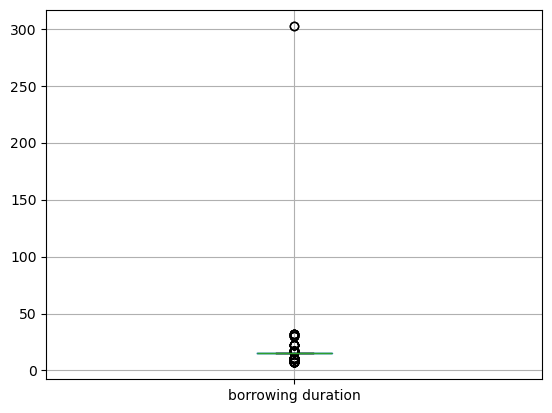

In [9]:
BORROWINGS.boxplot(column='borrowing duration')

In [10]:
BORROWINGS[BORROWINGS['borrowing duration']>250]

,Numéro,Cote,Titre,Type de document,N° lecteur,Nom,Prénom,Catégorie,borrowing duration
325,3731,006.31 SUT/1,"Reinforcement Learning, An introduction",Livre,en01,boulmarka,aissa,Enseignant,302
359,3887,005.74 COR,"Database Systems : Design, Implementation, & M...",Livre,en01,boulmarka,aissa,Enseignant,302


# **LIBRARY INVENTORY**


**Table info**


In [11]:
# Cleaningg the LIBRARY INVENTORY table
# table name : LIBRARY_INVENTORY

print ('Number of instance in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[0]))
print ('Number of attributes in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[1]))
print(LIBRARY_INVENTORY.columns)

Number of instance in the LIBRARY_INVENTORY TABLE  4255
Number of attributes in the LIBRARY_INVENTORY TABLE  16
Index(['N° inventaire', 'Date de réception', 'Titre', 'Auteur', 'Editeur',
       'Date d'édition', 'Lieu d'édition', 'Edition', 'Mode d'acquisition',
       'Statut', 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation',
       'Observation'],
      dtype='object')


**Missing Values & Check Duplicate**


In [12]:
# summery about missing values :
print(missing_values_summary(LIBRARY_INVENTORY))

#check duplicate :
checkDuplicat(LIBRARY_INVENTORY, "LIBRARY_INVENTORY")

                    missing_count  missing_percent
Observation                  4250        99.882491
Prix                         3397        79.835488
Fournisseur                  3353        78.801410
N° achat                     3353        78.801410
Date de réception            3227        75.840188
Edition                      3179        74.712103
Editeur                      1204        28.296122
Lieu d'édition                429        10.082256
Date d'édition                220         5.170388
Auteur                        105         2.467685
Cote                           83         1.950646
Localisation                   46         1.081081
Statut                         40         0.940071
N° inventaire                   0         0.000000
Titre                           0         0.000000
Mode d'acquisition              0         0.000000
Number of duplicate rows in LIBRARY_INVENTORY table is = 0


**Outliers**


<Axes: >

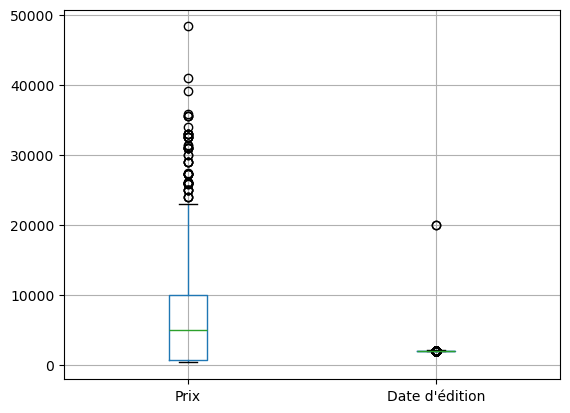

In [13]:

LIBRARY_INVENTORY["Date d'édition"] = pd.to_numeric(LIBRARY_INVENTORY["Date d'édition"], errors="coerce")
LIBRARY_INVENTORY.boxplot(column=["Prix","Date d'édition"])

In [14]:
LIBRARY_INVENTORY[LIBRARY_INVENTORY["Prix"]>40000]


,N° inventaire,Date de réception,Titre,Auteur,Editeur,Date d'édition,Lieu d'édition,Edition,Mode d'acquisition,Statut,Fournisseur,N° achat,Prix,Cote,Localisation,Observation
3081,380,2021-12-27,Project management for mining : handbook for d...,Hickson Robin J,"Society for Mining, Metallurgy & Exploration",2015.0,USA,NaN,Achat,Prêt externe,Planete livres diffusion,0244/21,48302.0,658.4.HIC/1,ENSIA,NaN
3246,3949,2024-04-21,Classification Décimale DEWEY,NaN,NaN,NaN,NaN,NaN,Achat,Prêt externe,Planete livres diffusion,0264/2024,41000.0,NaN,ENSIA,NaN


In [15]:
LIBRARY_INVENTORY[LIBRARY_INVENTORY["Date d'édition"]>10000]

,N° inventaire,Date de réception,Titre,Auteur,Editeur,Date d'édition,Lieu d'édition,Edition,Mode d'acquisition,Statut,Fournisseur,N° achat,Prix,Cote,Localisation,Observation
33,1027,NaT,Mathématiques : méthodes et exercices : PCSI-PTSI,"Marie Monier, Jean",NaN,20011.0,paris,NaN,Passif,Prêt externe,NaN,NaN,NaN,510 MON/1,NaN,NaN
34,1028,NaT,Mathématiques : méthodes et exercices : PCSI-PTSI,"Marie Monier, Jean",NaN,20011.0,paris,NaN,Passif,Prêt externe,NaN,NaN,NaN,510 MON/2,ENSIA,NaN


# **LIBRARY_CATALOGUE**


**table info**


In [37]:
# Cleaningg the LIBRARY_CATALOGUE table
# table name : LIBRARY_CATALOGUE

print ('Number of instance in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[0]))
print ('Number of attributes in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[1]))
print(LIBRARY_CATALOGUE.columns)

Number of instance in the LIBRARY_CATALOGUE TABLE  620
Number of attributes in the LIBRARY_CATALOGUE TABLE  6
Index(['ISBN, ISSN...', 'Titre', 'Auteur', 'Cote', 'Nbr. Exp.', 'Titre_clean'], dtype='object')


**Missing Values & check Duplicate**


In [38]:
# summery about missing values :
print(missing_values_summary(LIBRARY_CATALOGUE))

#check duplicate :
checkDuplicat(LIBRARY_CATALOGUE, "LIBRARY_CATALOGUE")

               missing_count  missing_percent
Nbr. Exp.                104        16.774194
ISBN, ISSN...             42         6.774194
Cote                      32         5.161290
Auteur                    17         2.741935
Titre                      0         0.000000
Titre_clean                0         0.000000
Number of duplicate rows in LIBRARY_CATALOGUE table is = 0


**Outliers**


<Axes: >

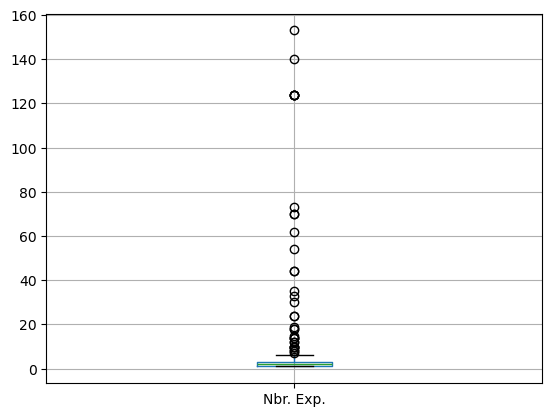

In [39]:
LIBRARY_CATALOGUE.boxplot(column='Nbr. Exp.')

In [40]:
LIBRARY_CATALOGUE[LIBRARY_CATALOGUE['Nbr. Exp.']>120]

,"ISBN, ISSN...",Titre,Auteur,Cote,Nbr. Exp.,Titre_clean
200,9789961020661,DE MES CAHIERS D’ANALYSE…SUITES NUMERIQUES : C...,Mohammed hazi,515.2 HAZ/100,124.0,de mes cahiers d’analyse…suites numeriques : c...
201,9789961020678,De mes cahiers d’analyse… fonctions réelles d’...,Hazi Mohammed,515.8 HAZ/100,124.0,de mes cahiers d’analyse… fonctions réelles d’...
202,9789961020685,Fonctions réelles d'une variable réelle : déri...,Hazi Mohammed,515.8 HAZ/100,153.0,fonctions réelles d'une variable réelle : déri...
203,9789961020692,De mes cahiers d’analyse.. Intégrale de Rieman...,Hazi Mohammed,515 HAZ/100,124.0,de mes cahiers d’analyse.. intégrale de rieman...
339,9789961020708,De mes cahiers d’analyse… équations différenti...,Hazi Mohammed,515.3 HAZ/1,124.0,de mes cahiers d’analyse… équations différenti...
354,9789961019306,TOUT SUR R : ENSEMBLE DES NOMBRES REELS STRUCT...,Mohammed hazi,512.55,124.0,tout sur r : ensemble des nombres reels struct...
355,9789961020715,FONCTIONS DE PLUSIEURS VARIABLES RELLES : IMIT...,Mohammed hazi,NaN,140.0,fonctions de plusieurs variables relles : imit...


**Merge Tables**


**data cleaning and preparation for text matching**

handling the Title column in the three tables because it’s the common column used for merging


In [41]:
# Clean titles (remove extra spaces, lowercase for matching)
def clean_title(title):
    return str(title).strip().lower()

BORROWINGS['Titre_clean'] = BORROWINGS['Titre'].apply(clean_title) 
LIBRARY_CATALOGUE['Titre_clean'] = LIBRARY_CATALOGUE['Titre'].apply(clean_title)
LIBRARY_INVENTORY['Titre_clean'] = LIBRARY_INVENTORY['Titre'].apply(clean_title)
#Stores the result in a new column called Titre_clean, which is used for merging.


**_Aggregation_**

For the Inventory table, instead of having multiple rows for the same book, we grouped them into a single row by adding a Total_copies column and storing all copy statuses in an array.


In [42]:
# List all columns in LIBRARY_INVENTORY
all_columns = LIBRARY_INVENTORY.columns.tolist()

# Columns you want to aggregate specially
agg_columns = {
    'N° inventaire': 'count',  
    'Date de réception': 'min',
    'Statut': lambda x: ', '.join(x.dropna().unique())
}

# For other columns, just take the first value 
for col in all_columns:
    if col not in agg_columns and col != 'Titre_clean':
        agg_columns[col] = 'first'  

# Perform aggregation
inventory_summary = LIBRARY_INVENTORY.groupby('Titre_clean').agg(agg_columns).rename(columns={
    'N° inventaire': 'Total_Copies',
    'Date de réception': 'First_Acquisition',
    'Statut': 'Copy_Statuses'
}).reset_index()

print("Length before aggregation:", len(LIBRARY_INVENTORY))
print("Length after aggregation:", len(inventory_summary))
print(inventory_summary.columns)
print (LIBRARY_INVENTORY.columns)


Length before aggregation: 4255
Length after aggregation: 732
Index(['Titre_clean', 'Total_Copies', 'First_Acquisition', 'Copy_Statuses',
       'Titre', 'Auteur', 'Editeur', 'Date d'édition', 'Lieu d'édition',
       'Edition', 'Mode d'acquisition', 'Fournisseur', 'N° achat', 'Prix',
       'Cote', 'Localisation', 'Observation'],
      dtype='object')
Index(['N° inventaire', 'Date de réception', 'Titre', 'Auteur', 'Editeur',
       'Date d'édition', 'Lieu d'édition', 'Edition', 'Mode d'acquisition',
       'Statut', 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation',
       'Observation', 'Titre_clean'],
      dtype='object')


**_Merge Tables_**


In [43]:
# Step 1: Keep only FIRST occurrence of each title in catalog
catalog_unique = LIBRARY_CATALOGUE.drop_duplicates(subset=['Titre_clean'], keep='first')
print(f"Catalog: {len(LIBRARY_CATALOGUE)} → {len(catalog_unique)} unique titles")

#Merge borrowing with catalog (by Title  )
merged_1 = pd.merge(
    BORROWINGS,
    catalog_unique ,
    how='left',
    left_on='Titre_clean' , 
    right_on='Titre_clean', 
    suffixes=('_borrowings', '_catalogue'))
#Merge result with inventory (by Title)
final_merged = pd.merge(
    merged_1,
    inventory_summary,
    how='left',
    left_on='Titre_clean', 
    right_on='Titre_clean', 
    suffixes=('_merged1', '_inventory'))

#clean up columns
#becuae Titre exist in the three tables Pandas automatically adds suffixes to distinguish them so we need to remove them .
if 'Titre_catalogue' in final_merged.columns:
  final_merged.drop('Titre_catalogue', axis=1 , inplace=True)
if 'Titre_inventory' in final_merged.columns:
  final_merged.drop('Titre_inventory', axis=1 , inplace=True)

#keep original title from borrowing table
final_merged.rename (columns={'Titre_borrowings' :'Titre' }, inplace=True)

#remove the titre_clean column
final_merged.drop('Titre_clean' , axis=1 , inplace=True)
print(f"Original borrowing rows: {len(BORROWINGS)}")
print(f"Final merged rows: {len(final_merged)}")
print(f"Columns: {list(final_merged.columns)}")

# Check for unmatched books
#Check borrowings not in catalog:
unmatched_borrowings = final_merged[final_merged['ISBN, ISSN...'].isna()]
print(f"Borrowings without catalog match: {len(unmatched_borrowings)}")
#Check borrowings not in inventory:
unmatched_inventory = final_merged[final_merged['Total_Copies'].isna()]
print(f"Borrowings without inventory match: {len(unmatched_inventory)}")

Catalog: 620 → 617 unique titles
Original borrowing rows: 422
Final merged rows: 422
Columns: ['Numéro', 'Cote_borrowings', 'Titre', 'Type de document', 'N° lecteur', 'Nom', 'Prénom', 'Catégorie', 'borrowing duration', 'ISBN, ISSN...', 'Auteur_merged1', 'Cote_catalogue', 'Nbr. Exp.', 'Total_Copies', 'First_Acquisition', 'Copy_Statuses', 'Titre', 'Auteur_inventory', 'Editeur', "Date d'édition", "Lieu d'édition", 'Edition', "Mode d'acquisition", 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation', 'Observation']
Borrowings without catalog match: 144
Borrowings without inventory match: 1


**_Save Final Table_**


In [44]:
# Save to CSV
final_merged.to_csv('../data/unified_library_data.csv', index=False, encoding='utf-8')

# Save to Excel
final_merged.to_excel('../data/unified_library_data.xlsx', index=False)

print(" Merge complete!")
print(f"Final dataset: {len(final_merged)} rows × {len(final_merged.columns)} columns")
print(f"File saved: unified_library_data.csv")
UNIFIED_LIBRARY_DATA = pd.read_excel ("unified_library_data.xlsx")

checkDuplicat(UNIFIED_LIBRARY_DATA, "LIBRARY_CATALOGUE")

 Merge complete!
Final dataset: 422 rows × 29 columns
File saved: unified_library_data.csv


FileNotFoundError: [Errno 2] No such file or directory: 'unified_library_data.xlsx'

**_End-to-end catalogue cleaning and feature engineering (Cote + ISBN)_**

**_Load the data and initial exploration_**

In [ ]:
import pandas as pd
import numpy as np
import re

# Load data
df = pd.read_csv('../data/unified_library_data.csv')

print("="*70)
print("ORIGINAL DATA")
print("="*70)
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())
print("\n")

ORIGINAL DATA
Shape: (422, 29)
Columns: ['Numéro', 'Cote_borrowings', 'Titre', 'Type de document', 'N° lecteur', 'Nom', 'Prénom', 'Catégorie', 'borrowing duration', 'ISBN, ISSN...', 'Auteur_merged1', 'Cote_catalogue', 'Nbr. Exp.', 'Total_Copies', 'First_Acquisition', 'Copy_Statuses', 'Titre.1', 'Auteur_inventory', 'Editeur', "Date d'édition", "Lieu d'édition", 'Edition', "Mode d'acquisition", 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation', 'Observation']

First 5 rows:
   Numéro Cote_borrowings                                              Titre  \
0    1000         515 MON      Exercices corrigés d'analyse : 1ère année LMD   
1    1005       510.BAL/1  Exercices d'algèbre et d'analyse : 154 exercic...   
2    1006       510.BAL/2  Exercices d'algèbre et d'analyse : 154 exercic...   
3    1007       510.BAL/3  Exercices d'algèbre et d'analyse : 154 exercic...   
4    1009   518.107.BAY/1  Exercices et problèmes d'algorithmique : 144 é...   

  Type de document N° lecteur     

**_Extract all existing COTE digits (first 3 digits)_**

In [ ]:
print("="*70)
print("STEP 1: EXTRACT COTE DIGITS")
print("="*70)

def extract_cote_digits(cote_str):
    """Extract first 3 digits from Cote"""
    if pd.isna(cote_str) or str(cote_str).strip() == '':
        return None
    
    # Find all digits in the string
    digits = re.findall(r'\d+', str(cote_str))
    if not digits:
        return None
    
    # Get first 3 digits
    first_number = digits[0]
    if len(first_number) >= 3:
        return first_number[:3]
    elif len(first_number) > 0:
        # Pad with zeros if less than 3 digits (e.g., "5" becomes "500")
        return first_number.ljust(3, '0')
    return None

# Extract digits
df['cote_digits'] = df['Cote'].apply(extract_cote_digits)

print("✓ Extracted cote_digits column")
print(f"\nUnique Cote digits found: {df['cote_digits'].nunique()}")
print("\nAll existing Cote digits in your data:")
print(sorted(df['cote_digits'].dropna().unique()))
print("\nSample:")
print(df[['Cote', 'cote_digits']].head(10))
print("\n")

STEP 1: EXTRACT COTE DIGITS
✓ Extracted cote_digits column

Unique Cote digits found: 21

All existing Cote digits in your data:
['004', '005', '006', '150', '230', '350', '380', '510', '511', '512', '515', '518', '519', '570', '610', '611', '616', '621', '658', '681', '808']

Sample:
            Cote cote_digits
0        515 MON         515
1      510.BAL/1         510
2      510.BAL/1         510
3      510.BAL/1         510
4  518.107.BAY/1         518
5   510.76 MON/1         510
6     510.76 GAU         510
7   510.76.OUD/1         510
8   510.76.OUD/1         510
9   510.76 ALL/2         510




**_Map Selected COTE Digits to Topics_**

In [ ]:
print("="*70)
print("STEP 2: MAP SELECTED COTE DIGITS TO FRENCH TOPICS")
print("="*70)

# Only for these 21 codes:
# ['004', '005', '006', '150', '230', '350', '380',
#  '510', '511', '512', '515', '518', '519',
#  '570', '610', '611', '616', '621', '658', '681', '808']

topic_mapping_fr = {
    '004': "Informatique générale",
    '005': "Programmation / logiciels",
    '006': "Intelligence artificielle / traitement automatique",
    '150': "Psychologie",
    '230': "Christianisme / religion",
    '350': "Administration publique",
    '380': "Commerce / communication",
    '510': "Mathématiques générales",
    '511': "Principes généraux des maths",
    '512': "Algèbre",
    '515': "Analyse / calcul",
    '518': "Méthodes numériques / calcul scientifique",
    '519': "Probabilités et statistiques appliquées",
    '570': "Sciences de la vie / biologie",
    '610': "Médecine / santé",
    '611': "Anatomie",
    '616': "Maladies / pathologie",
    '621': "Génie / ingénierie",
    '658': "Gestion / management",
    '681': "Appareils de précision / informatique appliquée",
    '808': "Techniques d’écriture / composition"
}

def map_to_topic_fr(cote_digit):
    """Map selected 3-digit Cote code to a French topic label."""
    if pd.isna(cote_digit) or cote_digit is None:
        return "Inconnu"
    return topic_mapping_fr.get(cote_digit, "Autre (hors sélection)")

# New column on df (still the working copy)
df["topic_fr"] = df["cote_digits"].apply(map_to_topic_fr)

print("✓ Created 'topic_fr' column using the 21 selected codes")
print("\nTopic_fr distribution:")
print(df["topic_fr"].value_counts())
print("\nSample:")
print(df[["Cote", "cote_digits", "topic_fr"]].head(15))
print("\n")


STEP 2: MAP SELECTED COTE DIGITS TO FRENCH TOPICS
✓ Created 'topic_fr' column using the 21 selected codes

Topic_fr distribution:
topic_fr
Algèbre                                               147
Analyse / calcul                                      102
Programmation / logiciels                              46
Probabilités et statistiques appliquées                35
Mathématiques générales                                27
Informatique générale                                  19
Intelligence artificielle / traitement automatique     11
Principes généraux des maths                            9
Génie / ingénierie                                      5
Inconnu                                                 4
Méthodes numériques / calcul scientifique               4
Gestion / management                                    2
Sciences de la vie / biologie                           2
Christianisme / religion                                1
Maladies / pathologie                            

**_Check missing "Inconnu" and "Autre (hors sélection)" values in topic column_**

In [ ]:
print("="*70)
print("CHECK TOPIC_FR COVERAGE")
print("="*70)

# 1) How many rows per topic
print("\nTopic_fr distribution:")
print(df["topic_fr"].value_counts(dropna=False))
print("\n")

# 2) Rows with missing topic (Inconnu)
mask_inconnu = df["topic_fr"] == "Inconnu"
print(f"Rows with 'Inconnu': {mask_inconnu.sum()}")
print(df.loc[mask_inconnu, ["Cote", "cote_digits", "topic_fr"]].head(10))
print("\n")

# 3) Rows mapped as other (hors sélection)
mask_autre = df["topic_fr"] == "Autre (hors sélection)"
print(f"Rows with 'Autre (hors sélection)': {mask_autre.sum()}")
print(df.loc[mask_autre, ["Cote", "cote_digits", "topic_fr"]].head(10))
print("\n")


CHECK TOPIC_FR COVERAGE

Topic_fr distribution:
topic_fr
Algèbre                                               147
Analyse / calcul                                      102
Programmation / logiciels                              46
Probabilités et statistiques appliquées                35
Mathématiques générales                                27
Informatique générale                                  19
Intelligence artificielle / traitement automatique     11
Principes généraux des maths                            9
Génie / ingénierie                                      5
Inconnu                                                 4
Méthodes numériques / calcul scientifique               4
Gestion / management                                    2
Sciences de la vie / biologie                           2
Christianisme / religion                                1
Maladies / pathologie                                   1
Médecine / santé                                        1
Techniques d’éc

**_ISBN cleaning and light mapping_**

**_Extract all existing ISBN group digits_**

In [ ]:
print("="*70)
print("STEP 3B: ANALYSE EXISTING ISBN GROUP DIGITS")
print("="*70)

def extract_group_digit(isbn):
    if pd.isna(isbn):
        return None
    s = str(isbn)
    # use cleaned version if available
    s = re.sub(r"[^0-9Xx]", "", s)
    if not s:
        return None
    if s.startswith(("978", "979")) and len(s) >= 4:
        return s[3]  # group after 978/979
    return s[0]     # older style

df["isbn_group_digit"] = df["isbn_clean"].apply(
    lambda x: extract_group_digit(x) if x is not None else None
)

print("Distribution des chiffres de groupe ISBN (d’après les données réelles) :")
print(df["isbn_group_digit"].value_counts(dropna=False))
print("\nExemples :")
print(df[["ISBN, ISSN...", "isbn_clean", "isbn_group_digit"]].head(15))
print("\n")


STEP 3B: ANALYSE EXISTING ISBN GROUP DIGITS
Distribution des chiffres de groupe ISBN (d’après les données réelles) :
isbn_group_digit
9       164
None    144
2        72
1        20
0        18
3         4
Name: count, dtype: int64

Exemples :
    ISBN, ISSN...     isbn_clean isbn_group_digit
0   9789961652855  9789961652855                9
1   9789931926221  9789931926221                9
2   9789931926221  9789931926221                9
3   9789931926221  9789931926221                9
4      2100069586     2100069586                2
5   9782100534227  9782100534227                2
6      210007363X     210007363X                2
7   9782311012989  9782311012989                2
8   9782311012989  9782311012989                2
9   9782011458100  9782011458100                2
10  9782311012972  9782311012972                2
11  9782311012972  9782311012972                2
12  9782729851118  9782729851118                2
13     2729812466     2729812466                2
14    

**_Map existing ISBN group digits into country/region labels (create isbn_country_fr)_**

In [ ]:
print("="*70)
print("STEP 3C: MAPPER LES GROUPES ISBN EN FRANÇAIS")
print("="*70)

# Dictionnaire basé UNIQUEMENT sur les chiffres présents : 0,1,2,3,9
isbn_group_mapping_fr = {
    "0": "Pays anglophones",
    "1": "Pays anglophones",
    "2": "Pays francophones",
    "3": "Pays germanophones",
    "9": "Pays scandinaves / autres"
}

def map_isbn_country_fr(group_digit, has_isbn):
    """
    Retourne un libellé français :
      - 'Sans ISBN' si aucun ISBN nettoyé
      - Libellé précis si groupe connu
      - 'Autre région' si groupe non mappé mais ISBN présent
    """
    if not has_isbn:
        return "Sans ISBN"
    if group_digit is None:
        return "Autre région"
    return isbn_group_mapping_fr.get(group_digit, "Autre région")

# Nouvelle colonne : région en français
df["isbn_country_fr"] = df.apply(
    lambda row: map_isbn_country_fr(
        row["isbn_group_digit"],
        row["isbn_clean"] is not None
    ),
    axis=1
)

print("✓ Colonne 'isbn_country_fr' créée\n")
print(df["isbn_country_fr"].value_counts(dropna=False))
print("\nExemples :")
print(df[["ISBN, ISSN...", "isbn_clean", "isbn_group_digit", "isbn_country_fr"]].head(15))
print("\n")


STEP 3C: MAPPER LES GROUPES ISBN EN FRANÇAIS
✓ Colonne 'isbn_country_fr' créée

isbn_country_fr
Pays scandinaves / autres    164
Sans ISBN                    144
Pays francophones             72
Pays anglophones              38
Pays germanophones             4
Name: count, dtype: int64

Exemples :
    ISBN, ISSN...     isbn_clean isbn_group_digit            isbn_country_fr
0   9789961652855  9789961652855                9  Pays scandinaves / autres
1   9789931926221  9789931926221                9  Pays scandinaves / autres
2   9789931926221  9789931926221                9  Pays scandinaves / autres
3   9789931926221  9789931926221                9  Pays scandinaves / autres
4      2100069586     2100069586                2          Pays francophones
5   9782100534227  9782100534227                2          Pays francophones
6      210007363X     210007363X                2          Pays francophones
7   9782311012989  9782311012989                2          Pays francophones
8   9782

**_Check missing / “autre” / “sans ISBN”_**

In [45]:
print("="*70)
print("STEP 3D: QUALITÉ DES DONNÉES ISBN")
print("="*70)

print("\nDistribution de isbn_country_fr :")
print(df["isbn_country_fr"].value_counts(dropna=False))
print("\n")

# Combien de lignes sans ISBN du tout
mask_sans_isbn = df["isbn_country_fr"] == "Sans ISBN"
print(f"Lignes sans ISBN : {mask_sans_isbn.sum()}")

# Lignes classées 'Autre région'
mask_autre = df["isbn_country_fr"] == "Autre région"
print(f"Lignes 'Autre région' : {mask_autre.sum()}")

# Lignes où isbn_clean est manquant (vraiment aucun code)
mask_isbn_clean_na = df["isbn_clean"].isna()
print(f"Lignes avec isbn_clean manquant : {mask_isbn_clean_na.sum()}")
print("\nExemples sans ISBN :")
print(df.loc[mask_sans_isbn, ["ISBN, ISSN...", "isbn_clean", "isbn_country_fr"]].head(10))
print("\nExemples 'Autre région' :")
print(df.loc[mask_autre, ["ISBN, ISSN...", "isbn_clean", "isbn_group_digit", "isbn_country_fr"]].head(10))
print("\n")


STEP 3D: QUALITÉ DES DONNÉES ISBN

Distribution de isbn_country_fr :
isbn_country_fr
Pays scandinaves / autres    164
Sans ISBN                    144
Pays francophones             72
Pays anglophones              38
Pays germanophones             4
Name: count, dtype: int64


Lignes sans ISBN : 144
Lignes 'Autre région' : 0
Lignes avec isbn_clean manquant : 144

Exemples sans ISBN :
   ISBN, ISSN... isbn_clean isbn_country_fr
16           NaN       None       Sans ISBN
19           NaN       None       Sans ISBN
20           NaN       None       Sans ISBN
50           NaN       None       Sans ISBN
67           NaN       None       Sans ISBN
68           NaN       None       Sans ISBN
69           NaN       None       Sans ISBN
70           NaN       None       Sans ISBN
87           NaN       None       Sans ISBN
95           NaN       None       Sans ISBN

Exemples 'Autre région' :
Empty DataFrame
Columns: [ISBN, ISSN..., isbn_clean, isbn_group_digit, isbn_country_fr]
Index: []




**_Final table with new extracted column_**

In [47]:
print("="*70)
print("STEP 4 (VERSION FINALE): NOUVELLE TABLE + EXPORT EXCEL")
print("="*70)

import os
os.makedirs("../data", exist_ok=True)

# Colonnes à garder : toutes les anciennes + un sous-ensemble de nouvelles
new_cols_keep = ["cote_digits", "topic_fr", "isbn_clean", "isbn_type", "isbn_country_fr"]

# On part de df (avec toutes les colonnes)
all_cols = list(df.columns)

# S'assurer que les colonnes choisies existent
final_cols = []
for c in all_cols:
    if c in new_cols_keep or c not in [
        "cote_digits", "topic_fr",
        "isbn_clean", "isbn_type",
        "isbn_country", "isbn_group_digit",
        "isbn_country_fr"
    ]:
        final_cols.append(c)
# Puis ajouter explicitement les nouvelles qu'on veut à la fin (ordre lisible)
for c in new_cols_keep:
    if c not in final_cols:
        final_cols.append(c)

df_final = df[final_cols].copy()

output_path = "../data/unified_library_with_topics_isbn.xlsx"
df_final.to_excel(output_path, index=False)

print(f"\n✓ Nouvelle table Excel sauvegardée dans : {output_path}")
print(f"Shape: {df_final.shape}")

print("\nHEAD DE LA NOUVELLE TABLE:")
print(df_final.head())

print("\nCOLONNES MARQUÉES (OLD/NEW):")
for col in df_final.columns:
    tag = "NEW" if col in new_cols_keep else "OLD"
    print(f"- {col}  -->  {tag}")


STEP 4 (VERSION FINALE): NOUVELLE TABLE + EXPORT EXCEL

✓ Nouvelle table Excel sauvegardée dans : ../data/unified_library_with_topics_isbn.xlsx
Shape: (422, 34)

HEAD DE LA NOUVELLE TABLE:
   Numéro Cote_borrowings                                              Titre  \
0    1000         515 MON      Exercices corrigés d'analyse : 1ère année LMD   
1    1005       510.BAL/1  Exercices d'algèbre et d'analyse : 154 exercic...   
2    1006       510.BAL/2  Exercices d'algèbre et d'analyse : 154 exercic...   
3    1007       510.BAL/3  Exercices d'algèbre et d'analyse : 154 exercic...   
4    1009   518.107.BAY/1  Exercices et problèmes d'algorithmique : 144 é...   

  Type de document N° lecteur        Nom       Prénom    Catégorie  \
0            Livre    5817912    MAMECHE       FERIEL  1 ére ANNEE   
1            Livre    5754033    fourali        malak  1 ére ANNEE   
2            Livre    5113394     SEHALI         MAYA  1 ére ANNEE   
3            Livre    6092419  kheddaoui      thiz